# Calibrating the HAT-P-1b NIRISS/SOSS observations with the JWST Pipeline
--------------------------------------------------------------
**Author**: Néstor Espinoza (nespinoza@stsci.edu) | **Latest update**: July 6, 2020.

## Table of contents
1. [Introduction](#intro)
2. [Passing the data through the JWST calibration pipeline](#jwstpipeline)
3. [Fitting ramps](#rampfit)

1.<font color='white'>-</font>Introduction <a class="anchor" id="intro"></a>
------------------

Given a simulated or real dataset, we now have to calibrate it using the [JWST calibration pipeline](https://github.com/spacetelescope/jwst) (simply defined as the "JWST pipeline", from now on), as the raw, uncalibrated data has various instrumental effects such as a bias pedestal, dark currents, non-linearity effects, etc. that we want to calibrate/remove/take care of before taking a deep dive into the data reduction on our own. As it is explained in the [pipeline documentation](https://jwst-pipeline.readthedocs.io/en/latest/index.html), the JWST pipeline consists of three stages: [the first](https://jwst-pipeline.readthedocs.io/en/latest/jwst/pipeline/calwebb_detector1.html#calwebb-detector1) performs detector-level corrections, the second one, divided between [spectroscopy](https://jwst-pipeline.readthedocs.io/en/latest/jwst/pipeline/calwebb_spec2.html#calwebb-spec2) and [imaging](https://jwst-pipeline.readthedocs.io/en/latest/jwst/pipeline/calwebb_image2.html) one performs instrument-speciic calibrations and the third stage, which is divided by scientific output which in our case is the [TSO3](https://jwst-pipeline.readthedocs.io/en/latest/jwst/pipeline/calwebb_tso3.html) one corresponding to time-series observations, combines that data in order to produce a final product.

If you haven't installed the pipeline yet, this is the time to do it. The steps are very simple; just pip-install the latest version of the [JWST pipeline from the Github repo](https://github.com/spacetelescope/jwst), and then set some enviornment data so the pipeline knows where to get the reference data to perform the reductions (see below). If in Mac OSX, for example, open a terminal and do:

`export CRDS_PATH=$HOME/crds_cache`

`export CRDS_SERVER_URL=https://jwst-crds.stsci.edu`

And then you are all set!

2.<font color='white'>-</font>Passing the data through the JWST calibration pipeline <a class="anchor" id="jwstpipeline"></a>
------------------

Let's pass our uncalibrated data through the JWST calibration pipeline. Here, we will pass it only through Stage 1 (i.e., detector-level calibrations for time-series observations), and extract the spectra from these products with our own algorithms in the next notebook. The reason for doing this is to provide the community with a basic understanding of the most basic products the pipeline provides, so they can more easily apply methods used in other instruments (e.g., HST, ground-based transit spectroscopy) to JWST observations.

As described in the pipeline documentation above, to use it you need to define some _configuration files_. These define which steps you want the pipeline to follow, to skip and/or which parameters to use for different steps. In our case, we have a configuration file stored under `config_files` --- in particular, the configuration file for stage 1 is `calwebb_tso1.cfg`. Let's pass that to the JWST pipeline, along with our uncalibrated data. (Note *this will take a while (> a day) if ran on a laptop* --- it is highly recommended to perform this pipeline run from a dedicated machine, and/or using the pipeline's multiprocessing capabilities):

In [4]:
from jwst.pipeline import Detector1Pipeline

tso1 = Detector1Pipeline.call('data_uncal.fits', save_results=True, 
                              config_file='config_files/calwebb_tso1.cfg')

2020-06-24 09:32:27,946 - CRDS - ERROR -  Error determining best reference for 'pars-groupscalestep'  =   Unknown reference type 'pars-groupscalestep'
2020-06-24 09:32:27,953 - CRDS - ERROR -  Error determining best reference for 'pars-dqinitstep'  =   Unknown reference type 'pars-dqinitstep'
2020-06-24 09:32:27,958 - CRDS - ERROR -  Error determining best reference for 'pars-saturationstep'  =   Unknown reference type 'pars-saturationstep'
2020-06-24 09:32:27,964 - CRDS - ERROR -  Error determining best reference for 'pars-ipcstep'  =   Unknown reference type 'pars-ipcstep'
2020-06-24 09:32:27,970 - CRDS - ERROR -  Error determining best reference for 'pars-superbiasstep'  =   Unknown reference type 'pars-superbiasstep'
2020-06-24 09:32:27,977 - CRDS - ERROR -  Error determining best reference for 'pars-refpixstep'  =   Unknown reference type 'pars-refpixstep'
2020-06-24 09:32:27,983 - CRDS - ERROR -  Error determining best reference for 'pars-rscd_step'  =   Unknown reference type 'p

2020-06-24 09:32:44,411 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'data_uncal.fits' reftypes = ['dark', 'gain', 'linearity', 'mask', 'readnoise', 'refpix', 'rscd', 'saturation', 'superbias']
2020-06-24 09:32:45,044 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/grp/crds/cache/references/jwst/jwst_niriss_dark_0114.fits'.
2020-06-24 09:32:45,098 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/grp/crds/cache/references/jwst/jwst_niriss_gain_0005.fits'.
2020-06-24 09:32:45,146 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/grp/crds/cache/references/jwst/jwst_niriss_linearity_0011.fits'.
2020-06-24 09:32:45,194 - stpipe.Detector1Pipeline - INFO - Prefetch for MASK reference file is '/grp/crds/cache/references/jwst/jwst_niriss_mask_0013.fits'.
2020-06-24 09:32:45,237 - stpipe.Detector1Pipeline - INFO - Prefetch for READNOISE reference file is '/grp/crds/cache/references/jws

2020-06-24 09:37:39,307 - stpipe.Detector1Pipeline.persistence - INFO - Step persistence running with args (<RampModel(1198, 3, 256, 2048) from data_uncal.fits>,).
2020-06-24 09:37:39,309 - stpipe.Detector1Pipeline.persistence - INFO - Step persistence parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True}
2020-06-24 09:37:39,310 - stpipe.Detector1Pipeline.persistence - INFO - Step skipped.
2020-06-24 09:37:39,312 - stpipe.Detector1Pipeline.persistence - INFO - Step persistence done
2020-06-24 09:37:39,424 - stpipe.Detector1Pipeline.dark_current - INFO - Step dark_current running with args (<RampModel(1198, 3, 256, 2048) from data_uncal.fits>,).
2020-06-24 09:37:39,426 - stpi

2020-06-24 09:41:20,270 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 22
2020-06-24 09:41:20,397 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409636 pixels with at least one CR
2020-06-24 09:41:24,489 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 23
2020-06-24 09:41:24,602 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409983 pixels with at least one CR
2020-06-24 09:41:28,676 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 24
2020-06-24 09:41:28,787 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409663 pixels with at least one CR
2020-06-24 09:41:32,860 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 25
2020-06-24 09:41:32,970 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409622 pixels with at least one CR
2020-06-24 09:41:37,008 - stpipe.Detector1Pipeline.jump - INFO -  working on integra

2020-06-24 09:43:44,589 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 58
2020-06-24 09:43:44,708 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409508 pixels with at least one CR
2020-06-24 09:43:48,402 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 59
2020-06-24 09:43:48,514 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409562 pixels with at least one CR
2020-06-24 09:43:52,238 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 60
2020-06-24 09:43:52,351 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409856 pixels with at least one CR
2020-06-24 09:43:56,094 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 61
2020-06-24 09:43:56,197 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409502 pixels with at least one CR
2020-06-24 09:44:00,047 - stpipe.Detector1Pipeline.jump - INFO -  working on integra

2020-06-24 09:46:11,178 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 94
2020-06-24 09:46:11,286 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409885 pixels with at least one CR
2020-06-24 09:46:15,241 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 95
2020-06-24 09:46:15,329 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409628 pixels with at least one CR
2020-06-24 09:46:19,184 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 96
2020-06-24 09:46:19,294 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409556 pixels with at least one CR
2020-06-24 09:46:23,288 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 97
2020-06-24 09:46:23,414 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409808 pixels with at least one CR
2020-06-24 09:46:27,368 - stpipe.Detector1Pipeline.jump - INFO -  working on integra

2020-06-24 09:48:37,859 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 130
2020-06-24 09:48:37,969 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409350 pixels with at least one CR
2020-06-24 09:48:41,836 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 131
2020-06-24 09:48:41,951 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409791 pixels with at least one CR
2020-06-24 09:48:45,796 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 132
2020-06-24 09:48:45,918 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409442 pixels with at least one CR
2020-06-24 09:48:50,093 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 133
2020-06-24 09:48:50,219 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409907 pixels with at least one CR
2020-06-24 09:48:54,519 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 09:51:20,103 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 166
2020-06-24 09:51:20,199 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409642 pixels with at least one CR
2020-06-24 09:51:24,056 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 167
2020-06-24 09:51:24,169 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409465 pixels with at least one CR
2020-06-24 09:51:27,988 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 168
2020-06-24 09:51:28,087 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409548 pixels with at least one CR
2020-06-24 09:51:31,936 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 169
2020-06-24 09:51:32,050 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409536 pixels with at least one CR
2020-06-24 09:51:35,905 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 09:53:42,603 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 202
2020-06-24 09:53:42,704 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409543 pixels with at least one CR
2020-06-24 09:53:46,806 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 203
2020-06-24 09:53:46,900 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409595 pixels with at least one CR
2020-06-24 09:53:51,085 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 204
2020-06-24 09:53:51,191 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409614 pixels with at least one CR
2020-06-24 09:53:55,300 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 205
2020-06-24 09:53:55,389 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409606 pixels with at least one CR
2020-06-24 09:53:59,507 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 09:56:21,702 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 238
2020-06-24 09:56:21,847 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409895 pixels with at least one CR
2020-06-24 09:56:26,702 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 239
2020-06-24 09:56:26,834 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409684 pixels with at least one CR
2020-06-24 09:56:31,728 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 240
2020-06-24 09:56:31,861 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409714 pixels with at least one CR
2020-06-24 09:56:36,709 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 241
2020-06-24 09:56:36,831 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409547 pixels with at least one CR
2020-06-24 09:56:41,565 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 09:59:05,743 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 274
2020-06-24 09:59:05,861 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409977 pixels with at least one CR
2020-06-24 09:59:10,451 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 275
2020-06-24 09:59:10,582 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409712 pixels with at least one CR
2020-06-24 09:59:15,182 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 276
2020-06-24 09:59:15,300 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409896 pixels with at least one CR
2020-06-24 09:59:19,917 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 277
2020-06-24 09:59:20,028 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409579 pixels with at least one CR
2020-06-24 09:59:24,486 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:01:51,491 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 310
2020-06-24 10:01:51,621 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409448 pixels with at least one CR
2020-06-24 10:01:56,203 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 311
2020-06-24 10:01:56,335 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409401 pixels with at least one CR
2020-06-24 10:02:00,819 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 312
2020-06-24 10:02:00,940 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409694 pixels with at least one CR
2020-06-24 10:02:05,418 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 313
2020-06-24 10:02:05,552 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409531 pixels with at least one CR
2020-06-24 10:02:10,062 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:04:36,851 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 346
2020-06-24 10:04:36,973 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409389 pixels with at least one CR
2020-06-24 10:04:41,762 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 347
2020-06-24 10:04:41,875 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409817 pixels with at least one CR
2020-06-24 10:04:46,245 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 348
2020-06-24 10:04:46,347 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409698 pixels with at least one CR
2020-06-24 10:04:50,474 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 349
2020-06-24 10:04:50,565 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409817 pixels with at least one CR
2020-06-24 10:04:54,457 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:07:03,879 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 382
2020-06-24 10:07:03,999 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409827 pixels with at least one CR
2020-06-24 10:07:07,989 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 383
2020-06-24 10:07:08,098 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409717 pixels with at least one CR
2020-06-24 10:07:12,164 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 384
2020-06-24 10:07:12,288 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409447 pixels with at least one CR
2020-06-24 10:07:16,325 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 385
2020-06-24 10:07:16,429 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409792 pixels with at least one CR
2020-06-24 10:07:20,433 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:09:33,836 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 418
2020-06-24 10:09:33,931 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409671 pixels with at least one CR
2020-06-24 10:09:38,071 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 419
2020-06-24 10:09:38,171 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409431 pixels with at least one CR
2020-06-24 10:09:42,584 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 420
2020-06-24 10:09:42,712 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409541 pixels with at least one CR
2020-06-24 10:09:47,291 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 421
2020-06-24 10:09:47,404 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409635 pixels with at least one CR
2020-06-24 10:09:52,021 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:12:05,019 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 454
2020-06-24 10:12:05,130 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409494 pixels with at least one CR
2020-06-24 10:12:09,422 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 455
2020-06-24 10:12:09,535 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409734 pixels with at least one CR
2020-06-24 10:12:13,773 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 456
2020-06-24 10:12:13,887 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409605 pixels with at least one CR
2020-06-24 10:12:17,975 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 457
2020-06-24 10:12:18,090 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409515 pixels with at least one CR
2020-06-24 10:12:22,206 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:14:32,673 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 490
2020-06-24 10:14:32,775 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409722 pixels with at least one CR
2020-06-24 10:14:36,594 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 491
2020-06-24 10:14:36,696 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409718 pixels with at least one CR
2020-06-24 10:14:40,492 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 492
2020-06-24 10:14:40,592 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409550 pixels with at least one CR
2020-06-24 10:14:44,419 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 493
2020-06-24 10:14:44,510 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409378 pixels with at least one CR
2020-06-24 10:14:48,329 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:16:58,704 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 526
2020-06-24 10:16:58,800 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409603 pixels with at least one CR
2020-06-24 10:17:02,787 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 527
2020-06-24 10:17:02,897 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409659 pixels with at least one CR
2020-06-24 10:17:07,284 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 528
2020-06-24 10:17:07,401 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409798 pixels with at least one CR
2020-06-24 10:17:11,668 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 529
2020-06-24 10:17:11,780 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409577 pixels with at least one CR
2020-06-24 10:17:16,083 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:19:29,725 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 562
2020-06-24 10:19:29,839 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409555 pixels with at least one CR
2020-06-24 10:19:34,046 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 563
2020-06-24 10:19:34,152 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409557 pixels with at least one CR
2020-06-24 10:19:38,412 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 564
2020-06-24 10:19:38,520 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409630 pixels with at least one CR
2020-06-24 10:19:42,943 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 565
2020-06-24 10:19:43,054 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409723 pixels with at least one CR
2020-06-24 10:19:47,668 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:22:06,395 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 598
2020-06-24 10:22:06,506 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409611 pixels with at least one CR
2020-06-24 10:22:10,491 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 599
2020-06-24 10:22:10,598 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409634 pixels with at least one CR
2020-06-24 10:22:14,572 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 600
2020-06-24 10:22:14,686 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409445 pixels with at least one CR
2020-06-24 10:22:18,642 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 601
2020-06-24 10:22:18,769 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409685 pixels with at least one CR
2020-06-24 10:22:22,759 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:24:34,735 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 634
2020-06-24 10:24:34,852 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409596 pixels with at least one CR
2020-06-24 10:24:39,025 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 635
2020-06-24 10:24:39,151 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409674 pixels with at least one CR
2020-06-24 10:24:43,289 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 636
2020-06-24 10:24:43,414 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409574 pixels with at least one CR
2020-06-24 10:24:47,445 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 637
2020-06-24 10:24:47,548 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409709 pixels with at least one CR
2020-06-24 10:24:51,479 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:27:15,764 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 670
2020-06-24 10:27:15,891 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409595 pixels with at least one CR
2020-06-24 10:27:20,630 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 671
2020-06-24 10:27:20,760 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409736 pixels with at least one CR
2020-06-24 10:27:25,243 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 672
2020-06-24 10:27:25,358 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409628 pixels with at least one CR
2020-06-24 10:27:29,775 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 673
2020-06-24 10:27:29,896 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409596 pixels with at least one CR
2020-06-24 10:27:35,069 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:30:03,581 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 706
2020-06-24 10:30:03,688 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409508 pixels with at least one CR
2020-06-24 10:30:08,251 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 707
2020-06-24 10:30:08,360 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409772 pixels with at least one CR
2020-06-24 10:30:12,868 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 708
2020-06-24 10:30:12,987 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409598 pixels with at least one CR
2020-06-24 10:30:17,304 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 709
2020-06-24 10:30:17,415 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409484 pixels with at least one CR
2020-06-24 10:30:21,582 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:32:50,869 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 742
2020-06-24 10:32:51,060 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409640 pixels with at least one CR
2020-06-24 10:32:57,970 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 743
2020-06-24 10:32:58,186 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409447 pixels with at least one CR
2020-06-24 10:33:06,611 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 744
2020-06-24 10:33:06,846 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409693 pixels with at least one CR
2020-06-24 10:33:15,100 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 745
2020-06-24 10:33:15,340 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409327 pixels with at least one CR
2020-06-24 10:33:24,604 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:37:10,856 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 778
2020-06-24 10:37:11,029 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409608 pixels with at least one CR
2020-06-24 10:37:17,432 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 779
2020-06-24 10:37:17,606 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409289 pixels with at least one CR
2020-06-24 10:37:23,991 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 780
2020-06-24 10:37:24,166 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409659 pixels with at least one CR
2020-06-24 10:37:30,505 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 781
2020-06-24 10:37:30,671 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409326 pixels with at least one CR
2020-06-24 10:37:37,310 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:41:08,345 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 814
2020-06-24 10:41:08,514 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409715 pixels with at least one CR
2020-06-24 10:41:14,952 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 815
2020-06-24 10:41:15,123 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409788 pixels with at least one CR
2020-06-24 10:41:21,607 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 816
2020-06-24 10:41:21,777 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409747 pixels with at least one CR
2020-06-24 10:41:28,293 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 817
2020-06-24 10:41:28,463 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409650 pixels with at least one CR
2020-06-24 10:41:34,849 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:45:01,216 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 850
2020-06-24 10:45:01,390 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409565 pixels with at least one CR
2020-06-24 10:45:07,858 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 851
2020-06-24 10:45:08,022 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409507 pixels with at least one CR
2020-06-24 10:45:14,372 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 852
2020-06-24 10:45:14,531 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409784 pixels with at least one CR
2020-06-24 10:45:20,546 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 853
2020-06-24 10:45:20,700 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409617 pixels with at least one CR
2020-06-24 10:45:26,703 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:48:35,626 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 886
2020-06-24 10:48:35,785 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409675 pixels with at least one CR
2020-06-24 10:48:41,667 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 887
2020-06-24 10:48:41,819 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409633 pixels with at least one CR
2020-06-24 10:48:47,661 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 888
2020-06-24 10:48:47,813 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409766 pixels with at least one CR
2020-06-24 10:48:53,470 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 889
2020-06-24 10:48:53,610 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409589 pixels with at least one CR
2020-06-24 10:48:59,278 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:52:30,688 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 922
2020-06-24 10:52:30,860 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409719 pixels with at least one CR
2020-06-24 10:52:37,487 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 923
2020-06-24 10:52:37,657 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409585 pixels with at least one CR
2020-06-24 10:52:44,306 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 924
2020-06-24 10:52:44,462 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409551 pixels with at least one CR
2020-06-24 10:52:50,919 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 925
2020-06-24 10:52:51,076 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409440 pixels with at least one CR
2020-06-24 10:52:57,668 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:56:36,548 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 958
2020-06-24 10:56:36,727 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409832 pixels with at least one CR
2020-06-24 10:56:43,890 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 959
2020-06-24 10:56:44,081 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409461 pixels with at least one CR
2020-06-24 10:56:51,252 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 960
2020-06-24 10:56:51,440 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409654 pixels with at least one CR
2020-06-24 10:56:58,592 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 961
2020-06-24 10:56:58,765 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409637 pixels with at least one CR
2020-06-24 10:57:06,552 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 10:59:41,209 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 994
2020-06-24 10:59:41,329 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409734 pixels with at least one CR
2020-06-24 10:59:45,372 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 995
2020-06-24 10:59:45,483 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409922 pixels with at least one CR
2020-06-24 10:59:49,560 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 996
2020-06-24 10:59:49,681 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409368 pixels with at least one CR
2020-06-24 10:59:53,784 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 997
2020-06-24 10:59:53,911 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409601 pixels with at least one CR
2020-06-24 10:59:57,989 - stpipe.Detector1Pipeline.jump - INFO -  working on int

2020-06-24 11:02:10,838 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1030
2020-06-24 11:02:10,978 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409758 pixels with at least one CR
2020-06-24 11:02:14,984 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1031
2020-06-24 11:02:15,125 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409694 pixels with at least one CR
2020-06-24 11:02:19,165 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1032
2020-06-24 11:02:19,281 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409835 pixels with at least one CR
2020-06-24 11:02:23,337 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1033
2020-06-24 11:02:23,468 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409565 pixels with at least one CR
2020-06-24 11:02:27,511 - stpipe.Detector1Pipeline.jump - INFO -  working on

2020-06-24 11:04:39,052 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1066
2020-06-24 11:04:39,148 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409913 pixels with at least one CR
2020-06-24 11:04:43,162 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1067
2020-06-24 11:04:43,295 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409469 pixels with at least one CR
2020-06-24 11:04:47,349 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1068
2020-06-24 11:04:47,460 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409882 pixels with at least one CR
2020-06-24 11:04:51,456 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1069
2020-06-24 11:04:51,576 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409817 pixels with at least one CR
2020-06-24 11:04:55,611 - stpipe.Detector1Pipeline.jump - INFO -  working on

2020-06-24 11:07:13,897 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1102
2020-06-24 11:07:14,026 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409751 pixels with at least one CR
2020-06-24 11:07:18,190 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1103
2020-06-24 11:07:18,323 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409770 pixels with at least one CR
2020-06-24 11:07:22,486 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1104
2020-06-24 11:07:22,618 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409658 pixels with at least one CR
2020-06-24 11:07:26,827 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1105
2020-06-24 11:07:26,944 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409666 pixels with at least one CR
2020-06-24 11:07:31,103 - stpipe.Detector1Pipeline.jump - INFO -  working on

2020-06-24 11:09:47,962 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1138
2020-06-24 11:09:48,092 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409608 pixels with at least one CR
2020-06-24 11:09:52,400 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1139
2020-06-24 11:09:52,528 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409423 pixels with at least one CR
2020-06-24 11:09:57,187 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1140
2020-06-24 11:09:57,330 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409748 pixels with at least one CR
2020-06-24 11:10:02,218 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1141
2020-06-24 11:10:02,369 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409706 pixels with at least one CR
2020-06-24 11:10:06,953 - stpipe.Detector1Pipeline.jump - INFO -  working on

2020-06-24 11:12:29,447 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1174
2020-06-24 11:12:29,585 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409552 pixels with at least one CR
2020-06-24 11:12:33,588 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1175
2020-06-24 11:12:33,712 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409486 pixels with at least one CR
2020-06-24 11:12:37,618 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1176
2020-06-24 11:12:37,750 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409264 pixels with at least one CR
2020-06-24 11:12:41,593 - stpipe.Detector1Pipeline.jump - INFO -  working on integration 1177
2020-06-24 11:12:41,708 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier Two point found 409586 pixels with at least one CR
2020-06-24 11:12:45,514 - stpipe.Detector1Pipeline.jump - INFO -  working on

2020-06-24 17:52:30,468 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2020-06-24 17:52:30,470 - stpipe.Detector1Pipeline.gain_scale - INFO - Step will be skipped
2020-06-24 17:52:30,475 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale done
2020-06-24 17:52:30,589 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<CubeModel(1198, 256, 2048) from data_ramp.fits>,).
2020-06-24 17:52:30,592 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scaleints', 'search_output_file': True, 'input_dir': ''}
2020-06-24 17:52:30,712 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2020-06-24 17:52:30,713 - stpipe.Detector1Pipeline.gain_scale - I

This first stage of the JWST calibration pipeline takes care of several features we observed in the frames in the raw data. Bias and dark currents are taken care in this stage, as well as "ramp-fitting". This latter term might be new to ground-based astronomers, who are used to observing fluxes on each of the images they read with their detectors. As is explained in the [JWST documentation](https://jwst-docs.stsci.edu/understanding-exposure-times), JWST (and HST!) detectors sample up-the-ramp --- i.e., they make non-destructive reads. For each integration, several groups (3 in our case!) record fluxes up-the-ramp, and what the JWST pipeline does is to try to use the data from all of them by fitting a straight line to those fluxes --- this is what "ramp-fitting" means.  

Let's explore the products of the pipeline. With our configuration file, there are three products: the `*rate.fits` files, the `*rateints.fits` file and the `*ramp.fits` file. Let's start with the latter:


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
hdul = fits.open('data_ramp.fits')
# Print headers:
print(hdul[0].header.keys)
# Print data shape:
data = hdul[1].data
print('\nData shape:',data.shape)

<bound method Header.keys of SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2020-06-24T13:33:11.108' / UTC date file created                     
FILENAME= 'data_ramp.fits'     / Name of the file                               
CAL_VER = '0.16.1  '           / Calibration software version number            
CAL_VCS = 'RELEASE '           / Calibration software version control sys number
DATAMODL= 'RampModel'          / Type of data model                             
TELESCOP= 'JWST    '           / Telescope used to acquire the data             
                                                                                
        Observation identifiers                                                 

As can be seen, the headers of this file (and all the other products) contain additional information below the `CRDS parameters`, which lists where all the data was obtained to calibrate the uncalibrated data. All of them come from the [JWST Calibration Reference Data System (CRDS)](https://jwst-crds.stsci.edu/), and you can inspect those products yourself to make sure the reduction is using the most up-to-date calibration files. Also, as seen at the end, the shape of the `*ramp` product is of dimensions $(N_\textrm{integrations},N_\textrm{groups},S,M)$. Let's explore the 3rd group of the 5th integration: 

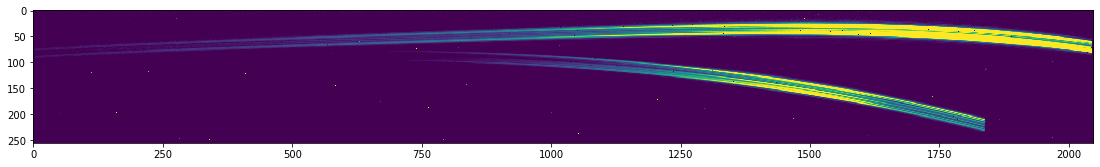

In [14]:
plt.figure(figsize=(19,4))
im = plt.imshow(data[5,2,:,:])
im.set_clim(-10,10000)

As can be seen from the product, this is a result of the pipeline in which the bias, dark, non-linearities and other detector-level systematics have been corrected/calibrated (compare this with the uncalibrated data --- see previous notebook)! Most of the structure of the data outside the traces has been removed, which is a good sign that everything is working more or less as expected. 

Next up are the `*rate.fits` and `*rateints` products. These products "collapse" the groups on each integration by fitting simple lines to each of the pixels in each of the groups, so each pixel has an associated "rate" (the slope of that line). The `*rate.fits` is a combination of all the integrations in the exposure, whereas the `*rateints` are the rates per integration. Let's explore this latter one:

In [15]:
hdul = fits.open('data_rateints.fits')
# Print headers:
print(hdul[0].header.keys)
# Print data shape:
data = hdul[1].data
print('\nData shape:',data.shape)

<bound method Header.keys of SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2020-06-24T17:52:30.778' / UTC date file created                     
FILENAME= 'data_rateints.fits' / Name of the file                               
CAL_VER = '0.16.1  '           / Calibration software version number            
CAL_VCS = 'RELEASE '           / Calibration software version control sys number
DATAMODL= 'CubeModel'          / Type of data model                             
TELESCOP= 'JWST    '           / Telescope used to acquire the data             
                                                                                
        Observation identifiers                                                 

Note the differences? The shape of the `*rateints` product is of dimensions $(N_\textrm{integrations},S,M)$. This is, at the end, the product with which we would like to work.

3.<font color='white'>-</font>Fitting ramps <a class="anchor" id="rampfitting"></a>
------------------

As a purely academic excercise, let's try getting our own ramps. To this, let's work with the `data_ramp.fits` file, create an empty file that will save the fits, and use the ordinary-least squares estimator for a slope to get the results:

Working on integration number 0
Working on integration number 1
Working on integration number 2
Working on integration number 3
Working on integration number 4
Working on integration number 5
Working on integration number 6
Working on integration number 7
Working on integration number 8
Working on integration number 9
Working on integration number 10
Working on integration number 11
Working on integration number 12
Working on integration number 13
Working on integration number 14
Working on integration number 15
Working on integration number 16
Working on integration number 17
Working on integration number 18
Working on integration number 19
Working on integration number 20
Working on integration number 21
Working on integration number 22
Working on integration number 23
Working on integration number 24
Working on integration number 25
Working on integration number 26
Working on integration number 27
Working on integration number 28
Working on integration number 29
Working on integrati

Working on integration number 245
Working on integration number 246
Working on integration number 247
Working on integration number 248
Working on integration number 249
Working on integration number 250
Working on integration number 251
Working on integration number 252
Working on integration number 253
Working on integration number 254
Working on integration number 255
Working on integration number 256
Working on integration number 257
Working on integration number 258
Working on integration number 259
Working on integration number 260
Working on integration number 261
Working on integration number 262
Working on integration number 263
Working on integration number 264
Working on integration number 265
Working on integration number 266
Working on integration number 267
Working on integration number 268
Working on integration number 269
Working on integration number 270
Working on integration number 271
Working on integration number 272
Working on integration number 273
Working on int

Working on integration number 486
Working on integration number 487
Working on integration number 488
Working on integration number 489
Working on integration number 490
Working on integration number 491
Working on integration number 492
Working on integration number 493
Working on integration number 494
Working on integration number 495
Working on integration number 496
Working on integration number 497
Working on integration number 498
Working on integration number 499
Working on integration number 500
Working on integration number 501
Working on integration number 502
Working on integration number 503
Working on integration number 504
Working on integration number 505
Working on integration number 506
Working on integration number 507
Working on integration number 508
Working on integration number 509
Working on integration number 510
Working on integration number 511
Working on integration number 512
Working on integration number 513
Working on integration number 514
Working on int

Working on integration number 727
Working on integration number 728
Working on integration number 729
Working on integration number 730
Working on integration number 731
Working on integration number 732
Working on integration number 733
Working on integration number 734
Working on integration number 735
Working on integration number 736
Working on integration number 737
Working on integration number 738
Working on integration number 739
Working on integration number 740
Working on integration number 741
Working on integration number 742
Working on integration number 743
Working on integration number 744
Working on integration number 745
Working on integration number 746
Working on integration number 747
Working on integration number 748
Working on integration number 749
Working on integration number 750
Working on integration number 751
Working on integration number 752
Working on integration number 753
Working on integration number 754
Working on integration number 755
Working on int

Working on integration number 968
Working on integration number 969
Working on integration number 970
Working on integration number 971
Working on integration number 972
Working on integration number 973
Working on integration number 974
Working on integration number 975
Working on integration number 976
Working on integration number 977
Working on integration number 978
Working on integration number 979
Working on integration number 980
Working on integration number 981
Working on integration number 982
Working on integration number 983
Working on integration number 984
Working on integration number 985
Working on integration number 986
Working on integration number 987
Working on integration number 988
Working on integration number 989
Working on integration number 990
Working on integration number 991
Working on integration number 992
Working on integration number 993
Working on integration number 994
Working on integration number 995
Working on integration number 996
Working on int

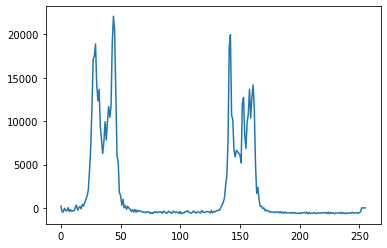

In [29]:
def get_slope(x,y,N=3):
    num = N*np.sum(x*y) - np.sum(x)*np.sum(y)
    den = N*np.sum(x**2) - (np.sum(x)**2)
    return num/den

hdul = fits.open('data_ramp.fits')
# Print data shape:
data = hdul[1].data
newramps = np.zeros([1198,256,2048])
tframe = 5.491 # seconds
times = (np.arange(3)+1)*tframe
plt.plot(data[0,2,:,1500])
for t in range(1198):
    print('Working on integration number {}'.format(t))
    for i in range(256):
        for j in range(2048):
            fluxes = data[t,:,i,j]
            newramps[t,i,j] = get_slope(times,fluxes)


Let's plot this, and save it to a file:

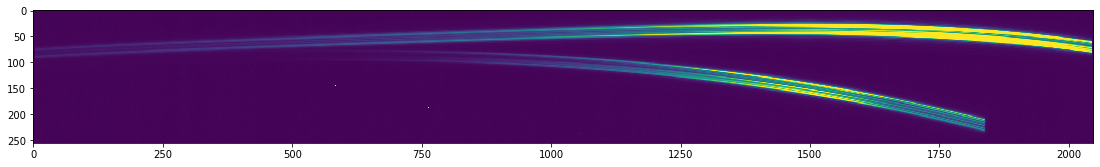

In [32]:
plt.figure(figsize=(19,4))
im = plt.imshow(newramps[5,:,:])
im.set_clim(-10,1000)

In [50]:
hdu_new = fits.PrimaryHDU(newramps)
hdul_new = fits.HDUList([hdu_new])
hdul_new.writeto('data_new_rateints.fits')